# Understanding Random Forest Classification and Its Effectiveness

```{index} Random Forest
```

A Random Forest is a versatile and robust machine learning algorithm used for both classification and regression tasks. It builds upon the concept of decision trees, but improves on their accuracy and overcomes their tendency to overfit by combining the predictions of numerous decision trees constructed on different subsets of the data. We have already [experimented with a Random Tree regressor](ml-pipeline-sklearn.ipynb), and in this experiment, we will focus on Random Forest classification.

## What are Random Forest models ?

A Random Forest operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees. It is termed as “Random” because of its ability to develop trees based on random subsets of features and data points, which ensures model variance and generally results in a more robust overall prediction.

Random Forest have the following key characteristics:

- **Robustness**: A Random Forest is less likely to overfit than decision trees, because they average multiple trees to give a more accurate prediction.
- **Handling of Unbalanced Data**: It can handle unbalanced data from both binary and multiclass classification problems effectively.
- **Feature Importance**: It provides insights into which features are most important for the prediction.
- **Explainability**: A Random Forest provides good explainability, and isn't a black box.

## The mechanics of the algorithm

The Random Forest algorithm follows these steps:

1. **Bootstrap Aggregating (Bagging)**: Random subsets of the data are created for training each tree, sampled with replacement.
2. **Random Feature Selection**: When splitting nodes during the formation of trees, only a random subset of features are considered.
3. **Building Trees**: Each subset is used to train a decision tree. Trees grow to their maximum length and are not pruned.
4. **Aggregation**: For classification tasks, the mode of all tree outputs is considered for the final output.

Random Forest typically outperform single decision trees due to their reduced variance without increasing bias. This means they are less likely to fit noise in the training data, making them significantly more accurate. They are also effective in scenarios where the feature space is large, and robust against overfitting which is a common issue in complex models.

## Effectiveness

Since their inception, it has been shown that Random Forest is highly effective for a wide range of problems. It is particularly known for their effectiveness in:

- Handling large data sets with higher dimensionality. They can handle thousands of input variables without variable deletion.
- Maintaining accuracy even when a large proportion of the data is missing.

## An example Random Forest classifier

Below is an example demonstrating the implementation of a Random Forest classifier using the `scikit-learn` library. This example uses the `Breast Cancer` dataset. Let us start by describing the data.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
breast_cancer = load_breast_cancer()

df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


And let's get a view into the distribution of the available data.

In [11]:
df.describe().drop('count').style.background_gradient(cmap='Greens')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


```{note}
The Random Forest algorithm is not sensitive to scale varience, so it is not necessary to preprocess and perform scale normalization on the data. This is one of the advantages of using Random Forest. It also handles missing values well, so imputation is not necessary, as well as handling both continuous and ordinal (categorical) data.
```

Let us build and train a Random Forest model with the data we just loaded.

In [12]:
# Split data into features and target
X = breast_cancer.data
y = breast_cancer.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest classifier: {accuracy:.2f}')

Accuracy of Random Forest classifier: 0.97


This is all good and proper, but what do we mean by a "decision tree"? Let us clarify this by visualizing one of the random trees that has been built by the algorithm during the training. Each node in the tree represents a "decision" point and helps to split the data based on the best possible feature and threshold to differentiate the outcomes.

- **Root Node**: This is the top-most node of the tree where the first split is made. The split at this node is based on the feature that results in the most significant information gain or the best Gini impurity decrease. Essentially, it chooses the feature and threshold that provide the clearest separation between the classes based on the target variable.

- **Splitting Nodes**: These are the nodes where subsequent splits happen. Each splitting node examines another feature and makes a new decision, slicing the dataset into more homogeneous (or pure) subsets. Splitting continues until the algorithm reaches a predefined maximum depth, a minimum number of samples per node, or no further information gain is possible, among other potential stopping criteria.

- **Leaf Nodes**: Leaf nodes are the terminal nodes of the tree at which no further splitting occurs. Each leaf node represents a decision outcome or prediction. In classification trees, the leaf node assigns the class that is most frequent among the samples in that node. In regression trees, the leaf usually predicts the mean or median of the targets.

- **Branches**: Branches represent the outcome of a test in terms of feature and threshold. Each branch corresponds to one of the possible answers to the question posed at the node: Is the feature value higher or lower than the threshold? This binary splitting makes the structure of a decision tree inherently simple to understand.

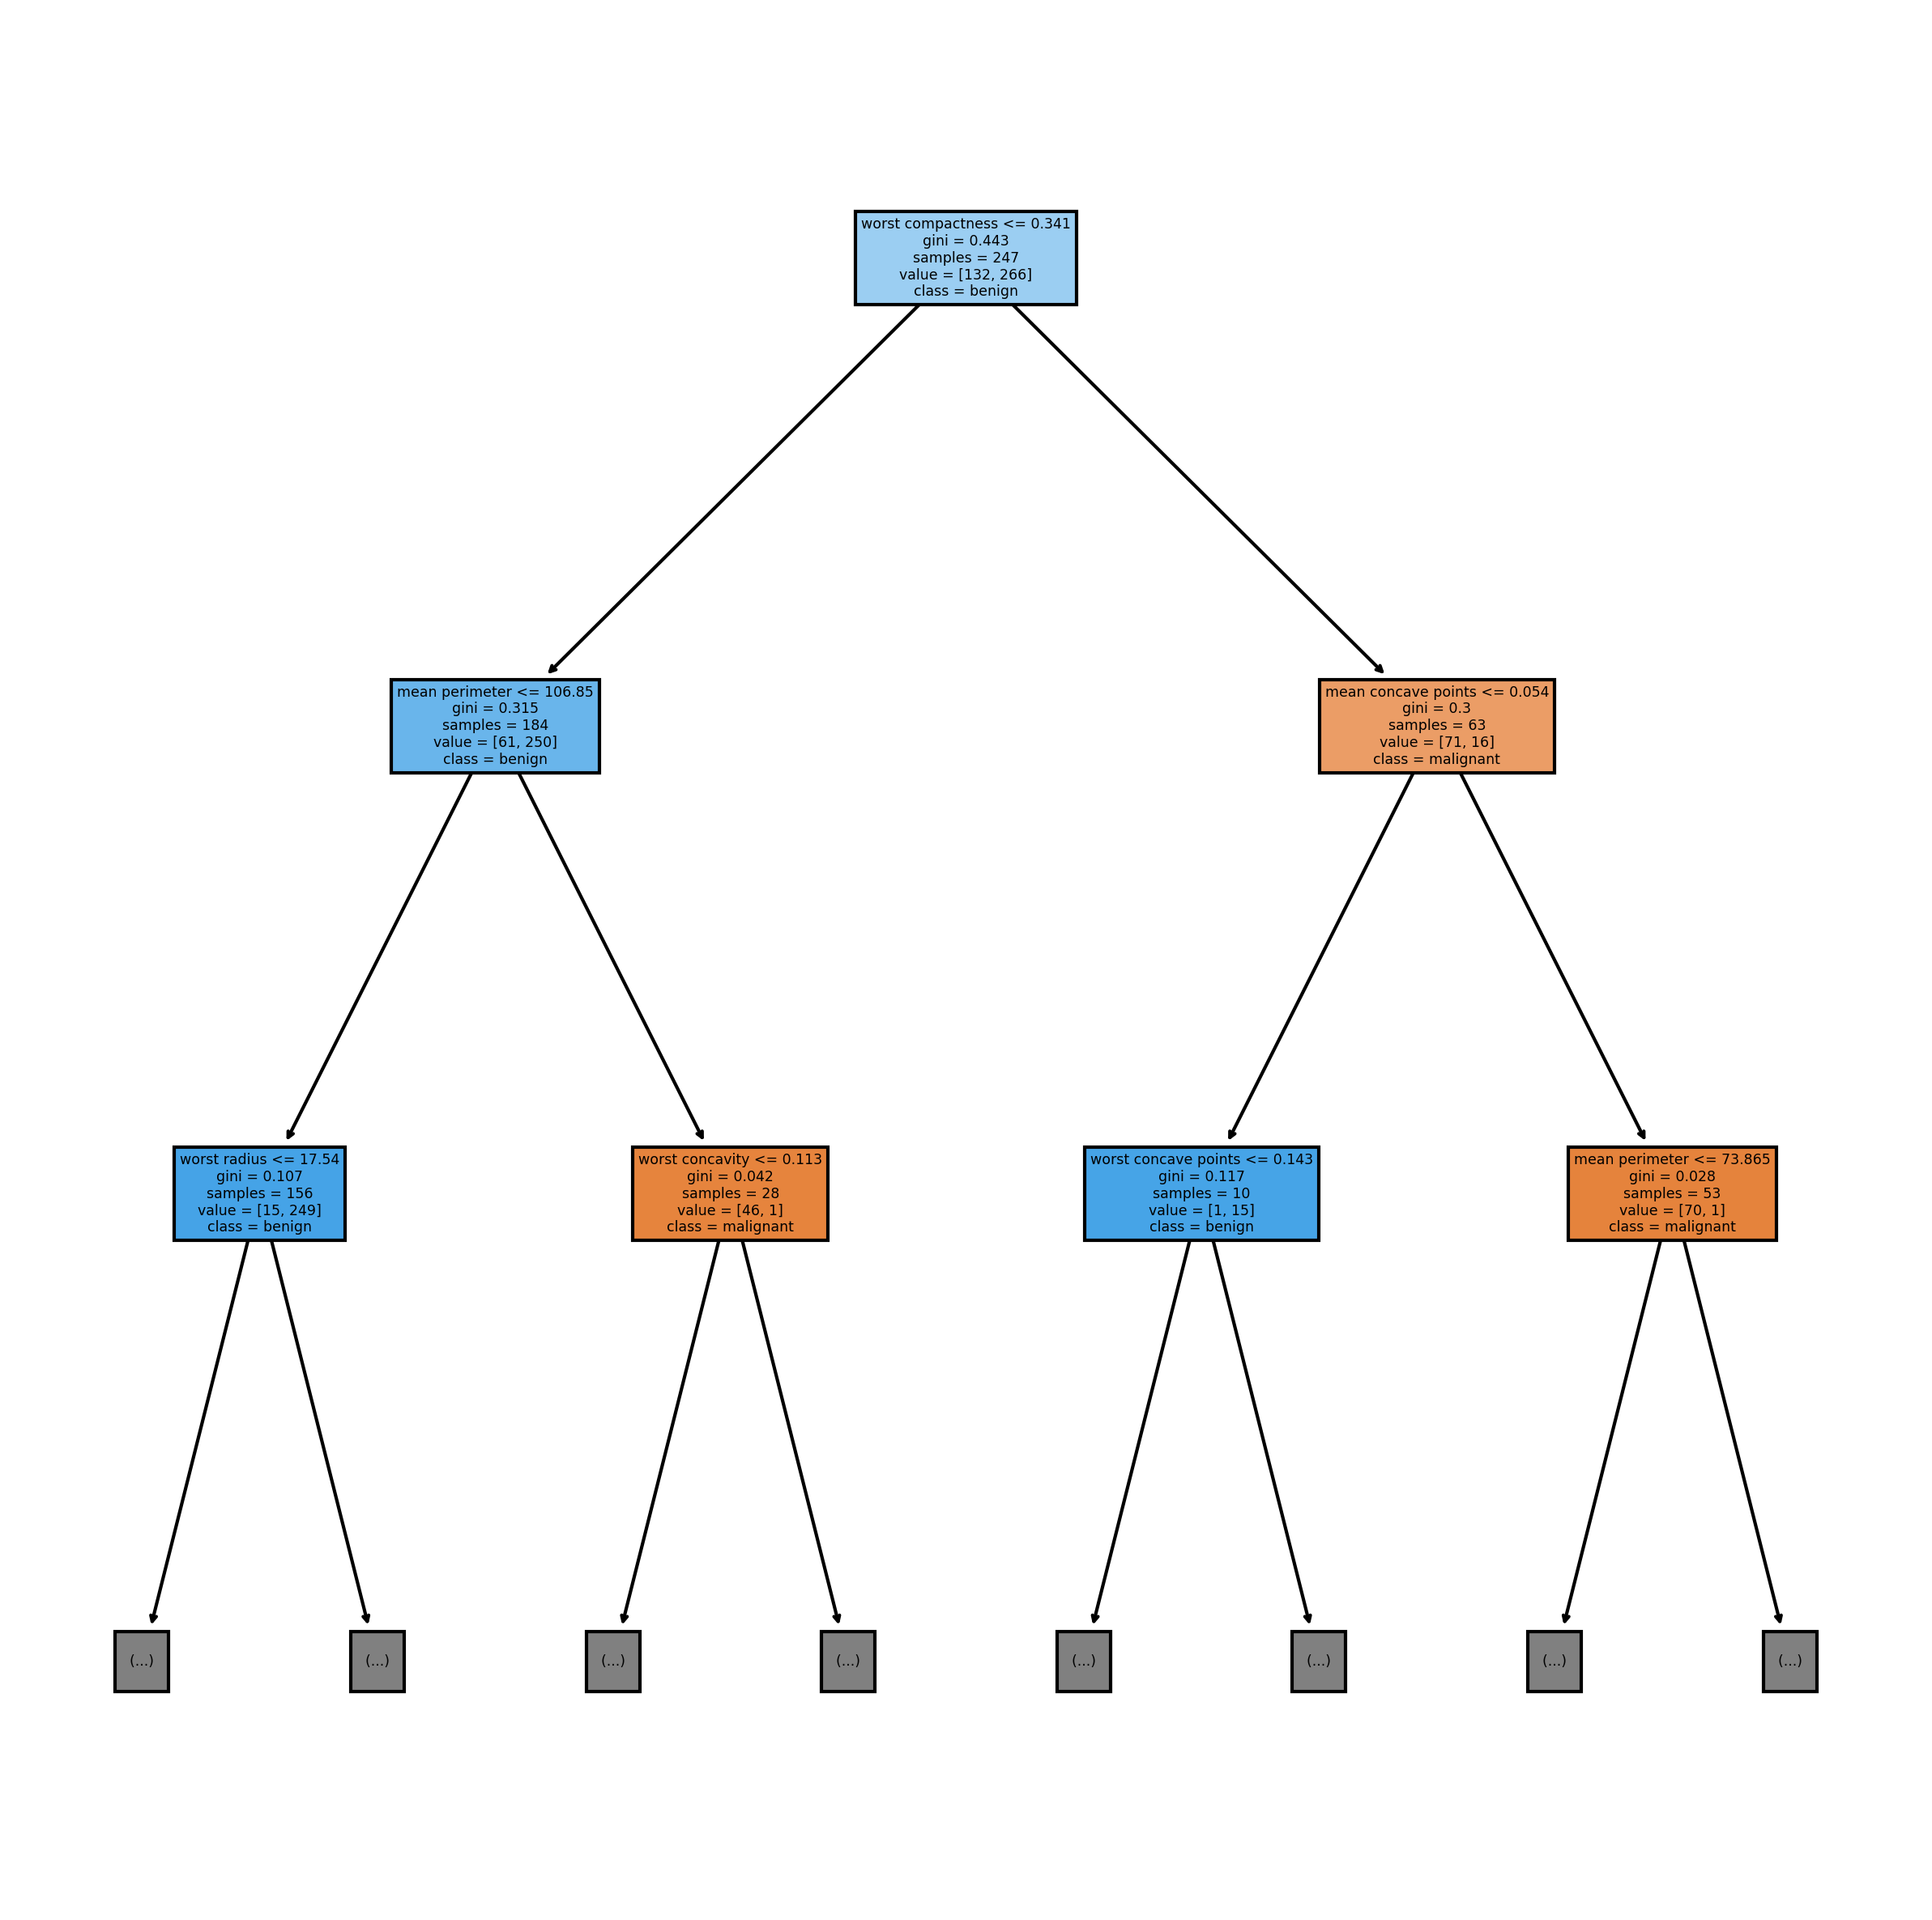

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

# Select the tree that you want to visualize (e.g., the fifth tree in the forest)
estimator = clf.estimators_[5]

# Create a figure for the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=300)

# Visualize the tree using plot_tree function
tree.plot_tree(estimator,
               feature_names=breast_cancer.feature_names,
               class_names=breast_cancer.target_names,
               filled=True,
               max_depth=2,  # Limit the depth of the tree for better readability
               ax=axes)

# Display the plot
plt.show()

We have seen a single tree, but Random Forest is an ensemble of multiple trees. The final prediction is made by aggregating the predictions of all the trees in the forest. We can also visualise all or a subset of trees in the forest to grasp the complexity and diversity of the model.

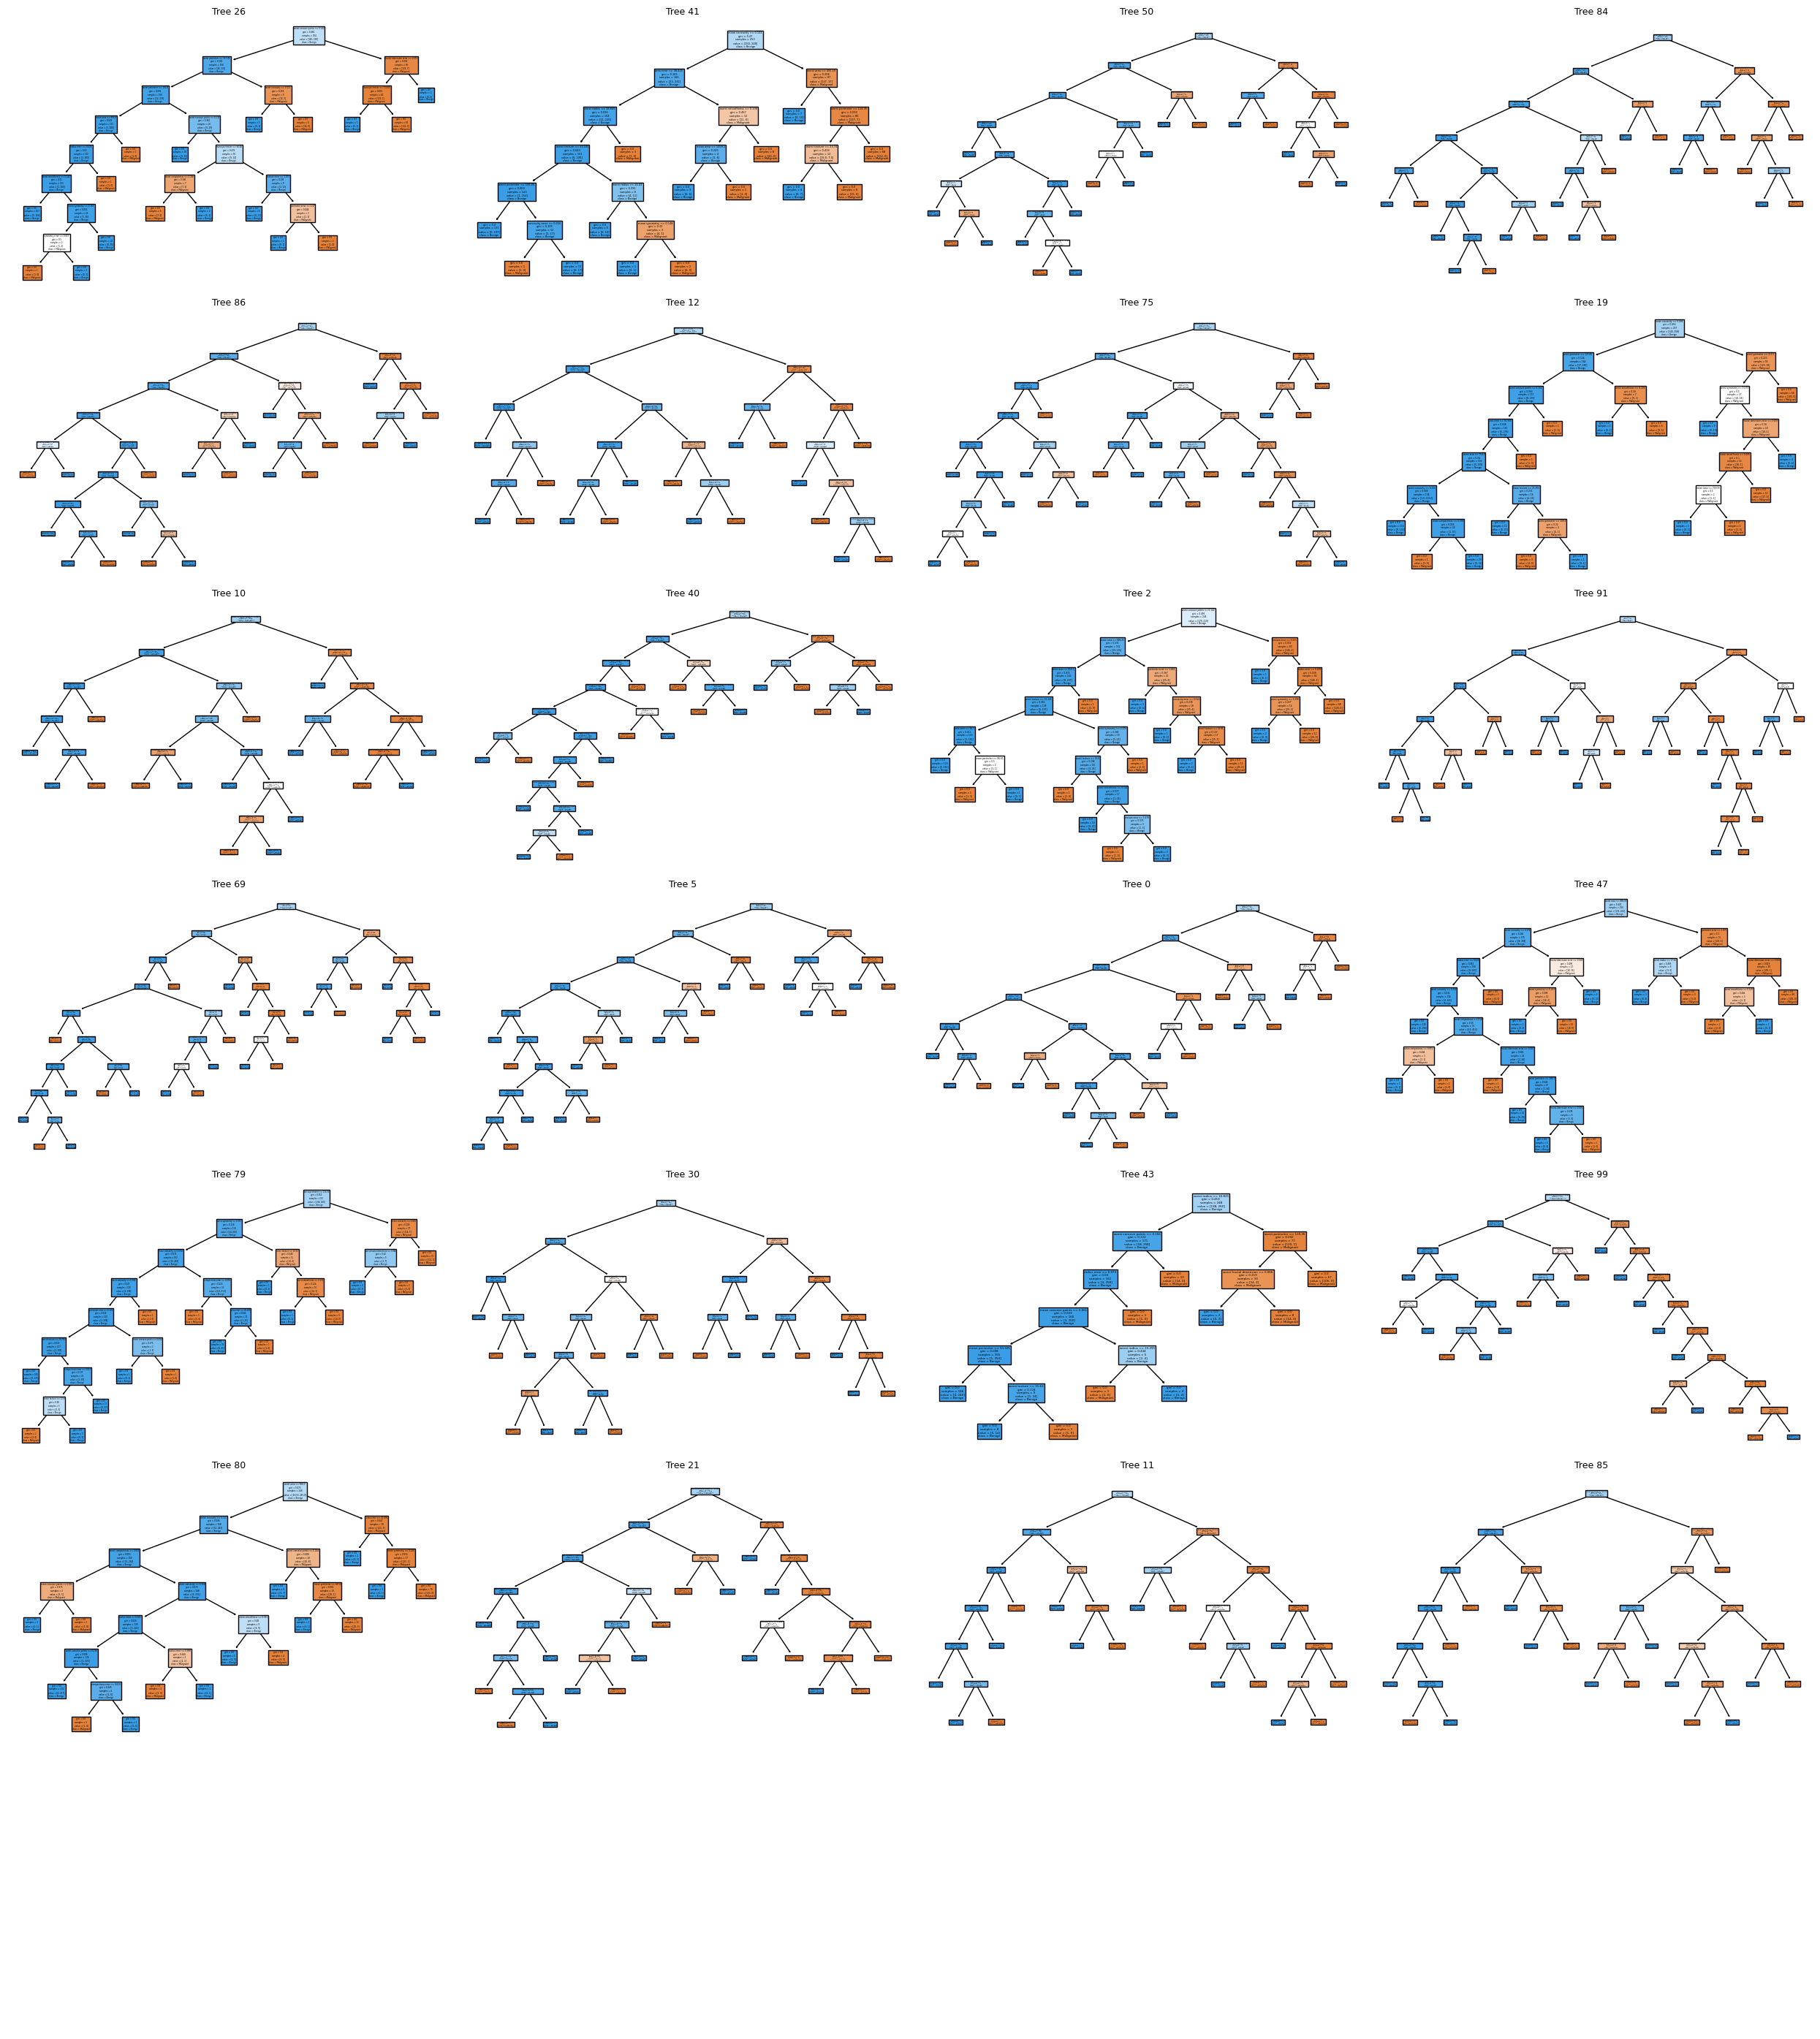

In [14]:
import random

# Total number of trees in the random forest
total_trees = len(clf.estimators_)

# Number of trees to plot
num_trees_to_plot = 24

# Randomly pick 'num_trees_to_plot' trees from the random forest
selected_trees = random.sample(range(total_trees), num_trees_to_plot)

# Create a figure object and an array of axes objects (subplots)
fig, axes = plt.subplots(nrows=(num_trees_to_plot // 4) + 1, ncols=4, figsize=(25, 4 * ((num_trees_to_plot // 4) + 1)))

# Flatten the array of axes (for easy iteration if it's 2D due to multiple rows)
axes = axes.flatten()

# Plot each randomly selected tree using a subplot
for i, ax in enumerate(axes[:num_trees_to_plot]):  # Limit axes iteration to number of trees to plot
    tree_index = selected_trees[i]
    tree.plot_tree(clf.estimators_[tree_index], feature_names=breast_cancer.feature_names, class_names=['Malignant', 'Benign'], filled=True, ax=ax)
    ax.set_title(f'Tree {tree_index}', fontsize=9)

# If there are any leftover axes, turn them off (when num_trees_to_plot is not a multiple of 4)
for ax in axes[num_trees_to_plot:]:
    ax.axis('off')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()


## Explainability

```{index} Trees ; visualisation
```

We've established that Random Forest models offer substantial explainability, unlike many other complex model frameworks that are often considered "black boxes." To elucidate this aspect, one effective method is visualizing the decision paths used by the trees within the forest when making predictions. This can be accomplished using the [dtreeviz](https://github.com/parrt/dtreeviz) library, which provides a detailed and interactive visualization of the decision-making process within a tree.

Using dtreeviz, we can trace the decision path of a single example from the training set across any of the trees in the model. This visualization includes splits made at each node, the criteria for these splits, and the distribution of target classes at each step. Such detailed traceability helps in understanding exactly how the model is arriving at its conclusions, highlighting the individual contributions of features in the decision process.

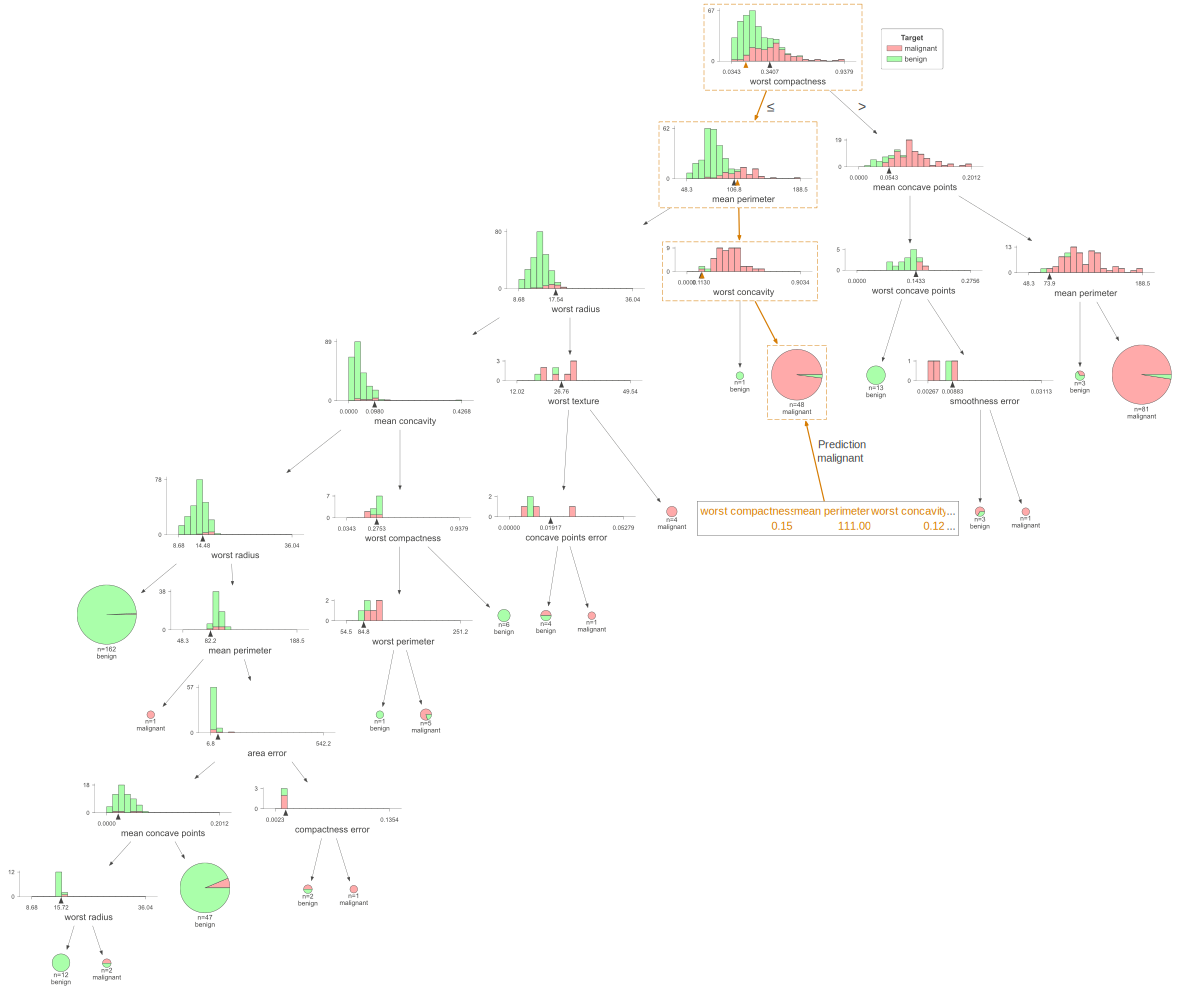

In [15]:
from dtreeviz import model

# Suppress warnings - this is just to shut up warnings about fonts in GitHub Actions
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

# The training sample to visualize
x = X_train[5]

# Define colors for benign and malignant
color_map = {'classes':
                         [None,  # 0 classes
                          None,  # 1 class
                          ["#FFAAAA", "#AAFFAA"],  # 2 classes
                          ]}

# Visualizing the selected tree
viz = model(estimator,
               X_train,
               y_train,
               target_name='Target',
               feature_names=breast_cancer.feature_names,
               class_names=list(breast_cancer.target_names))

viz.view(x=x, colors=color_map)


Another great feature of Random Forests is that they can explain the relative importance of each feature when predicting results. For our `Breast Cancer` dataset, here is how each feature impacts the model.

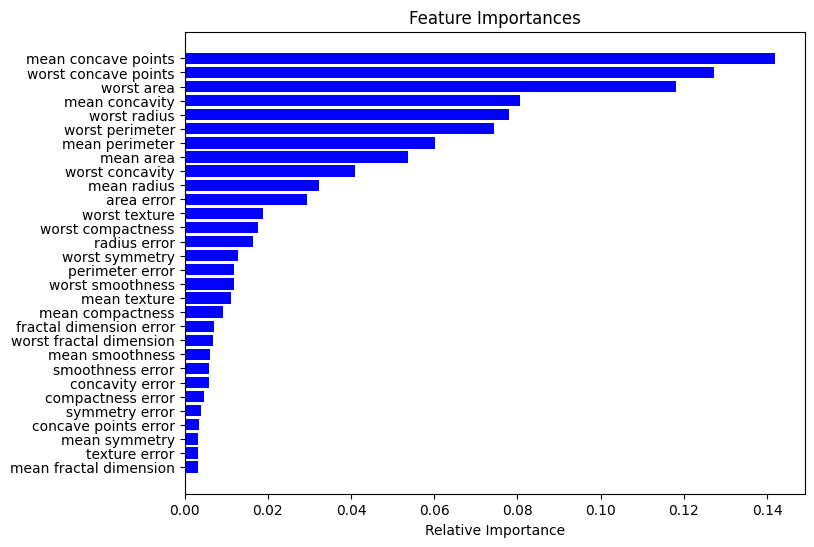

In [16]:
import numpy as np

features = breast_cancer.feature_names
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Now that we know which features are most important, we can use `dtreeviz` to visualise the classification boundaries for any pair of features. This can help us understand how the model is making decisions. Let us visualise classification boundaries for `worst concave points` and `worst area` features.

```{index} Trees ; classification boundaries
```

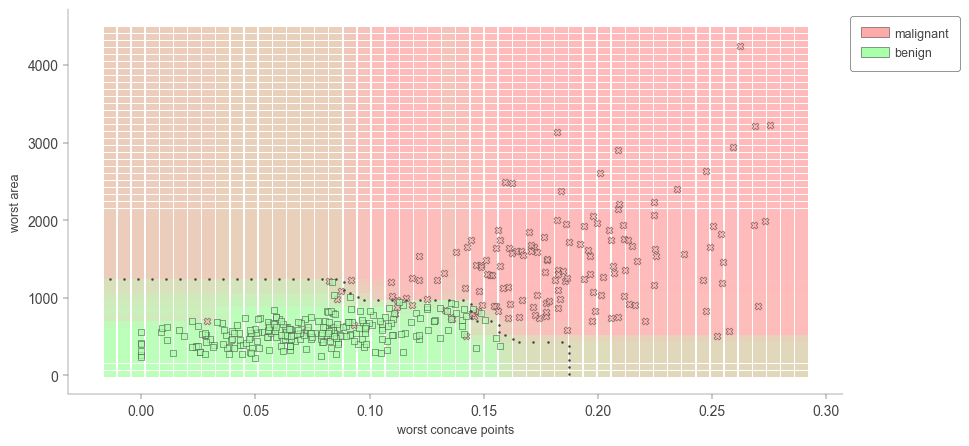

In [17]:
from dtreeviz import decision_boundaries

X_features_for_boundaries = X_train[:, [27,23]] # 27 = 'worst concave points', 23 = 'worst area'
new_clf = RandomForestClassifier(random_state=42)
new_clf.fit(X_features_for_boundaries, y_train)

fig,axes = plt.subplots(figsize=(10,5))
decision_boundaries(new_clf, X_features_for_boundaries, y_train, ax=axes,
       feature_names=['worst concave points', 'worst area'],
       class_names=breast_cancer.target_names,
       markers=['X', 's'], colors=color_map)
plt.show()

We can also plot pairs of features and their decision boundaries in a grid, to understand how pairs of features interact in the model. This can help us understand the relationships between features and how they contribute to the model's predictions. Let us do so for random pairs, just for illustration purposes. In practice, you would choose pairs of features that are most important for your specific problem.

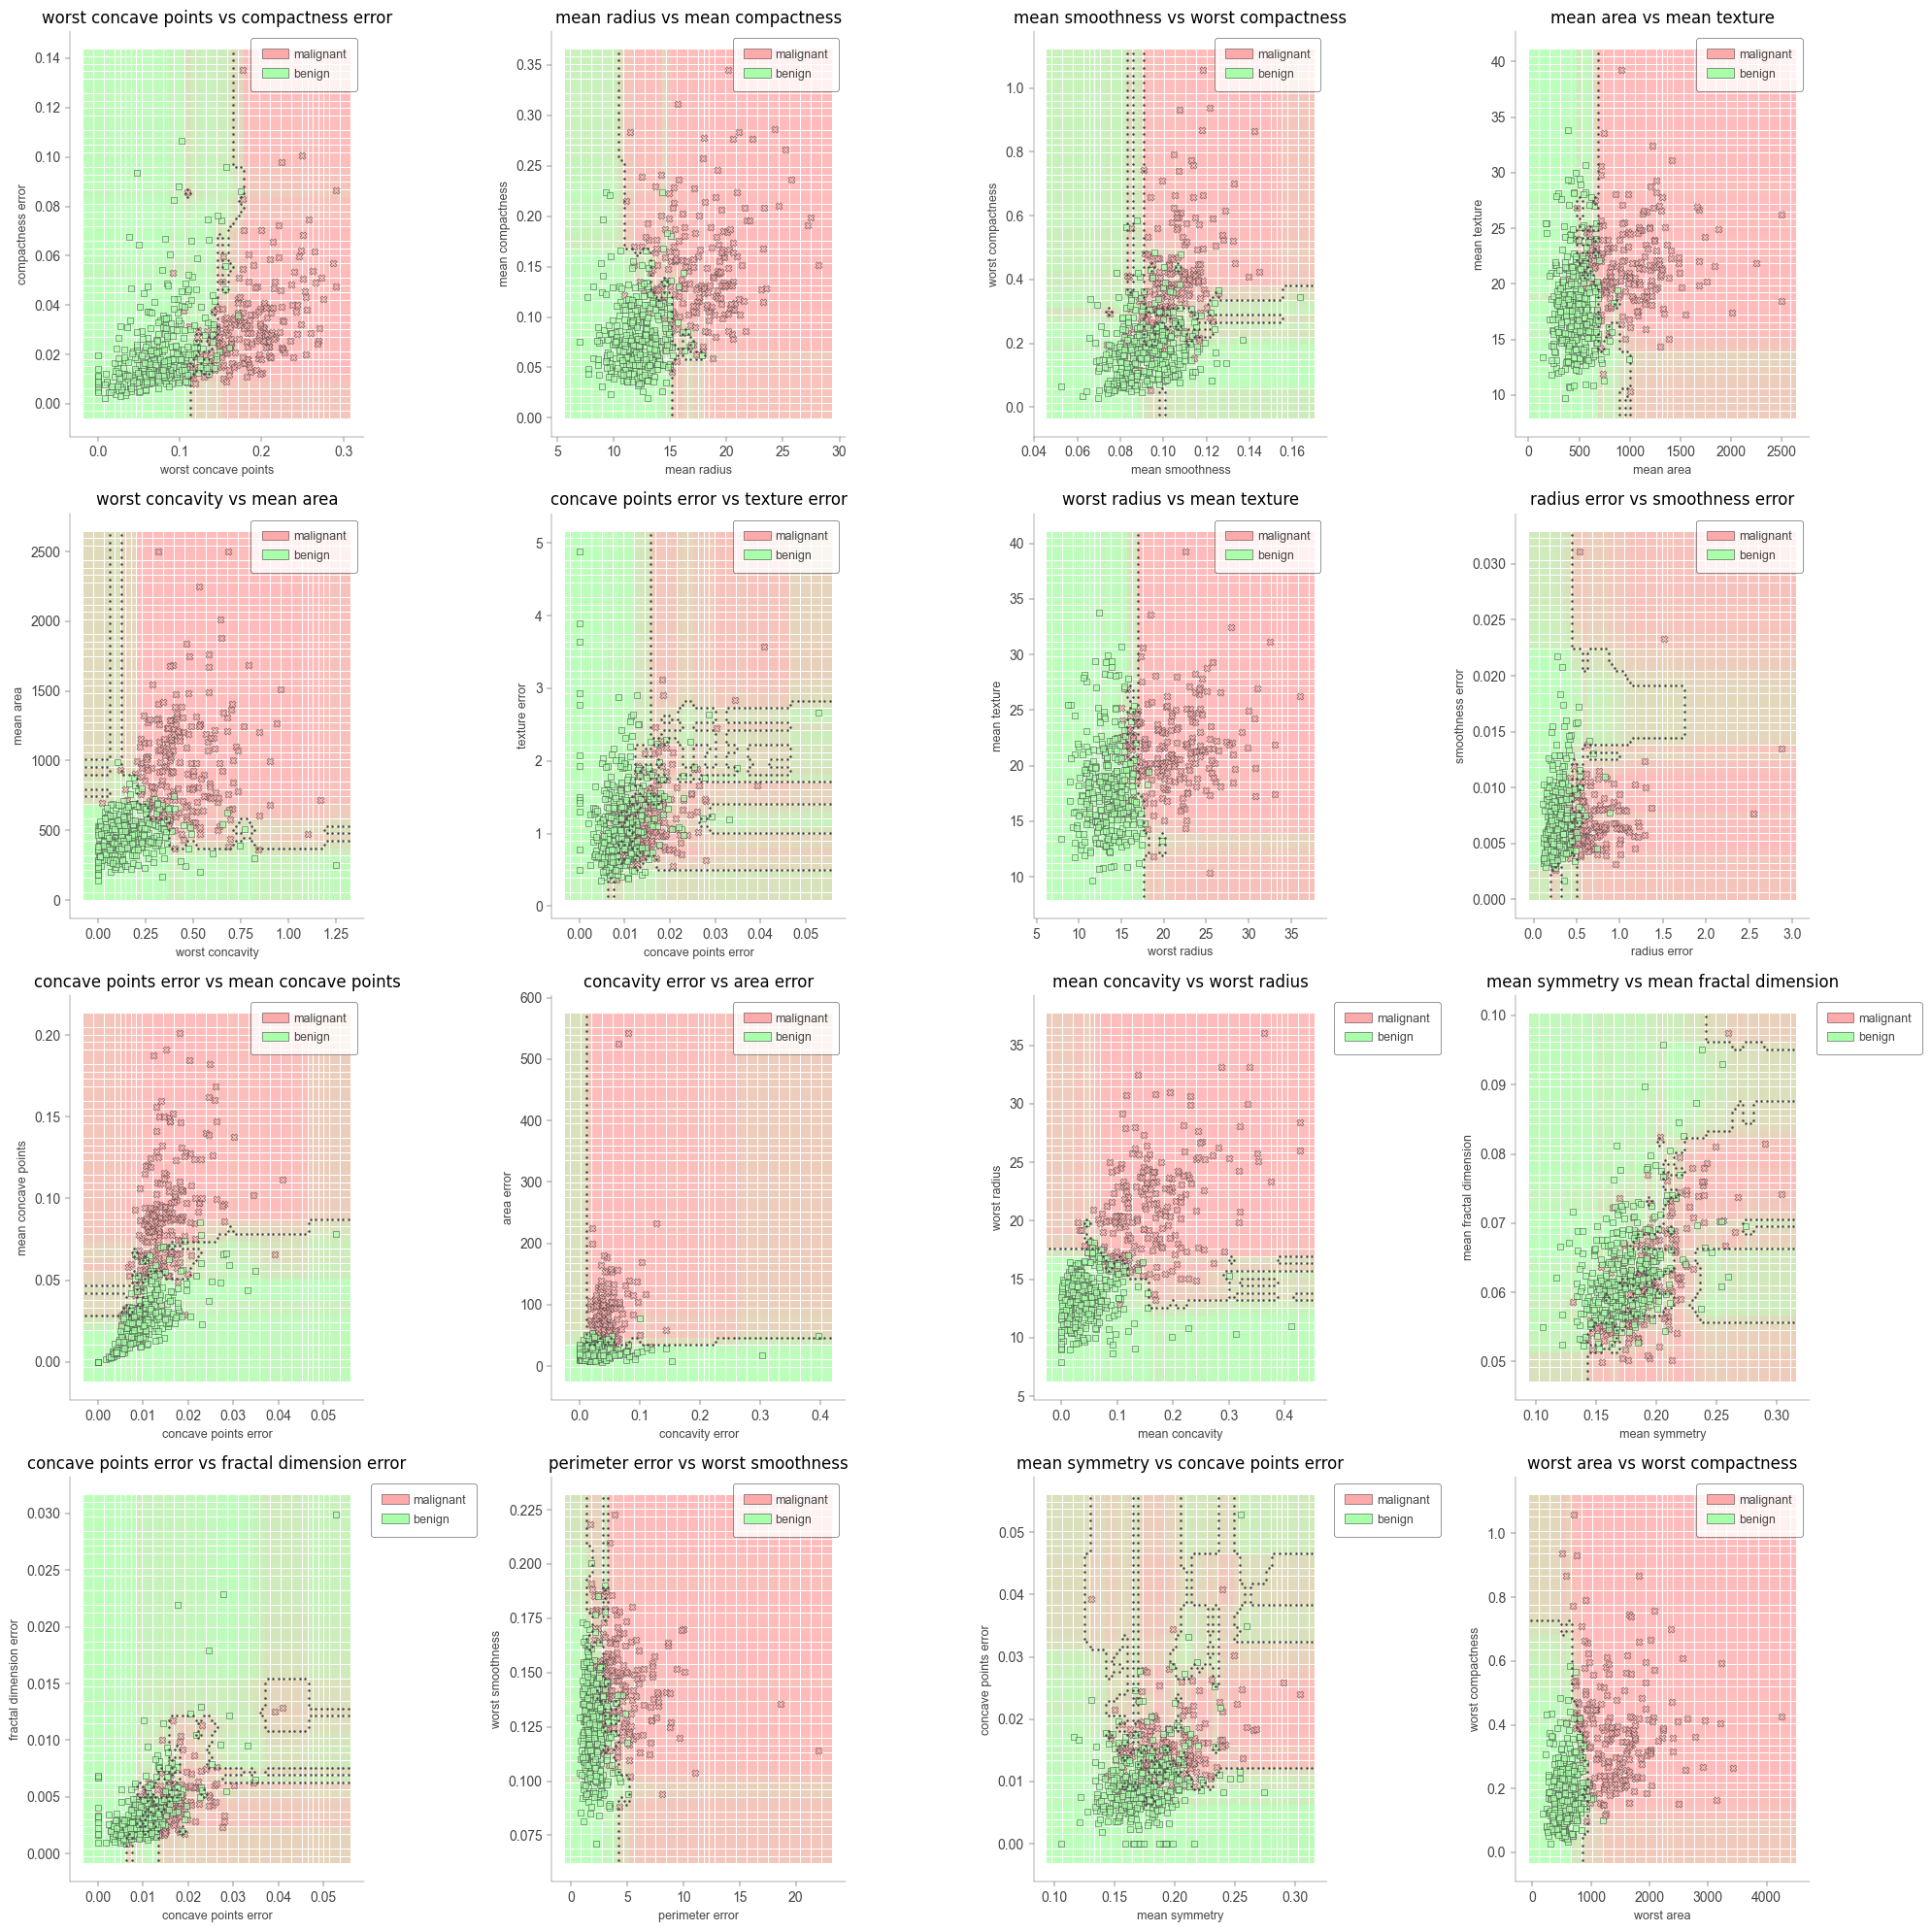

In [18]:

# Set a random seed for reproducibility
np.random.seed(42)

# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Randomly select and plot decision boundaries for 5x5 pairs of features
for ax in axes:
    # Randomly pick two distinct features
    features_idx = np.random.choice(range(X.shape[1]), size=2, replace=False)
    X_features_for_boundaries = X[:, features_idx]

    # Train a new classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_features_for_boundaries, y)

    # Plot decision boundaries using dtreeviz
    decision_boundaries(clf, X_features_for_boundaries, y, ax=ax,
                        feature_names=features[features_idx],
                        class_names=breast_cancer.target_names,
                        markers=['X', 's'], colors=color_map)

    # Set titles for the subplots
    ax.set_title(f"{features[features_idx[0]]} vs {features[features_idx[1]]}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Random Forests vs Neural Networks

Comparing Random Forests to neural networks involves considering several factors such as accuracy, training time, interpretability, and scalability across different types of data and tasks. Both algorithms have their unique strengths and weaknesses, making them suitable for specific scenarios.

## Performance metrics

**1. Accuracy:**
- **Random Forests** often provide very competitive accuracy with much simpler implementations compared to deep learning models. They perform exceptionally well for many classical data science problems, especially those involving structured data.
- **Neural Networks**, particularly deep learning models, excel in tasks involving unstructured data such as image recognition, natural language processing, and audio recognition due to their ability to learn complex patterns and high-level features.

**2. Training Time:**
- **Random Forests** are generally faster to train compared to deep neural networks on small to medium-sized datasets. This is because they can be trained in parallel and do not require iterative aspect characteristic of gradient descent which is used in training neural networks.
- **Neural Networks** require a longer training time, often needing sophisticated hardware like GPUs or TPUs to train efficiently on large datasets. Their training time also heavily depends on the complexity of the architecture.

**3. Interpretability:**
- **Random Forests** are more interpretable than neural networks, as the decision paths through the trees can be followed, and the importance of different features can be quantified.
- **Neural Networks** are often considered "black boxes" because their decision-making process (especially in deep learning) is not easily understandable, making them less preferable in areas where interpretability is crucial, such as healthcare and finance.

**4. Robustness and Variance:**
- **Random Forests** handle variance well by averaging multiple trees, which individually might have high variance if deep. They are less likely to overfit than individual decision trees.
- **Neural Networks** can overfit especially if not properly regularized or if trained too long without enough data. However, techniques such as dropout, batch normalization, and early stopping are commonly used to combat this.

**5. Scalability:**
- **Random Forests** scale well due to their ability to run processes in parallel during both training and prediction phases.
- **Neural Networks**, particularly those designed for big data, can scale efficiently but require significant computational resources to do so. They are highly scalable in terms of adaptability to various input sizes (especially in CNNs).

## Suitability based on data type

- **Random Forests** are particularly well-suited for:
  - Classification and regression on structured data
  - Large datasets, but with a limitation on the input feature space (high-dimensional spaces might lead to slower performance)
  - Applications requiring a balance between accuracy and interpretability

- **Neural Networks** are more appropriate for:
  - High-complexity tasks involving image, text, or audio
  - Unstructured data which requires feature learning
  - Situations where model interpretability is less critical than performance

## Example comparisons

- In **image recognition**, neural networks (specifically convolutional neural networks) perform significantly better than random forests due to their ability to hierarchically learn features directly from data.
- In **tabular data prediction**, random forests typically outperform neural networks, especially when the dataset isn’t huge, as they can better leverage the structure within the data without the need for extensive parameter tuning.

## Final remarks

In summary, Random Forests are excellent for many traditional machine learning tasks and provide a good mix of accuracy, ease of use, and speed, especially on structured data. Neural networks are preferable for tasks involving complex patterns and large scales of unstructured data, although they require more resources and effort to tune and interpret.

Choosing between the two often depends on the specific requirements of the task, the nature of the data involved, and the computational resources available. In practice, it's also common to evaluate both types of models along with others to find the best tool for a particular job.